✅ Sierra Leone data loaded. Shape: (525600, 19)

=== SUMMARY STATISTICS ===
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571      26.319394   
std       298.495150     218.652659     158.946032       4.398605   
min       -19.500000      -7.800000     -17.900000      12.300000   
25%        -2.800000      -0.300000      -3.800000      23.100000   
50%         0.300000      -0.100000      -0.100000      25.300000   
75%       362.400000     107.000000     224.700000      29.400000   
max      1499.000000     946.000000     892.000000      39.900000   

                  RH             WS  
count  525600.000000  525600.000000  
mean       79.448857       1.146113  
std        20.520775       1.239248  
min         9.900000       0.000000  
25%        68.700000       0.000000  
50%        85.400000       0.800000  
75%        96.700000       2.000000 

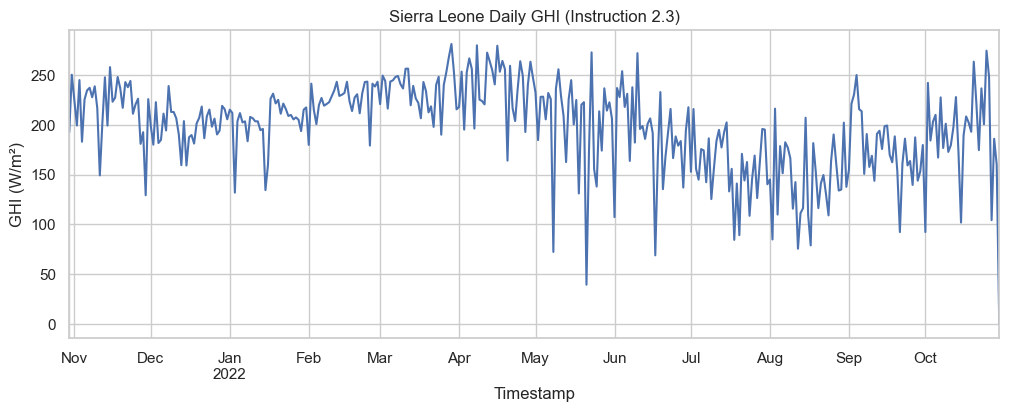

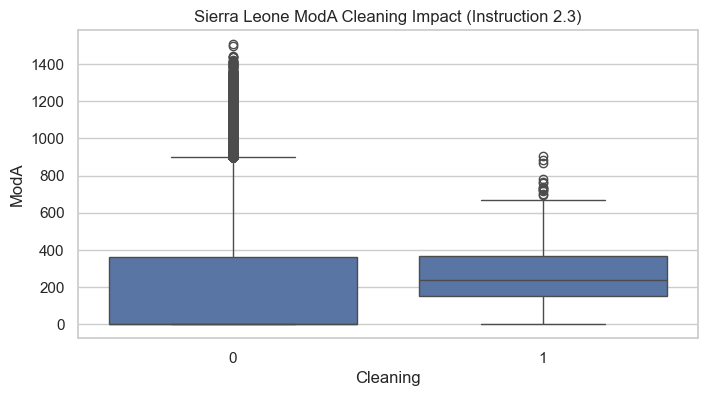

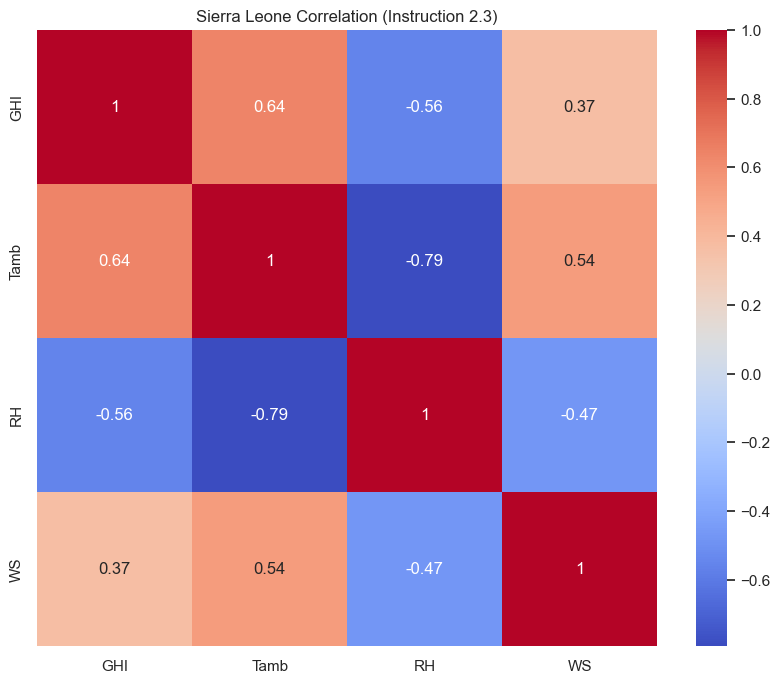


✅ data/sierra_leone_clean.csv saved


In [8]:
# Sierra Leone EDA - Solar Challenge Task 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# === INSTRUCTION 2.1: Data Loading ===
df = pd.read_csv(Path('data/sierra_leone_raw.csv'), 
                sep='\t', 
                parse_dates=['Timestamp'])
print("✅ Sierra Leone data loaded. Shape:", df.shape)

# === INSTRUCTION 2.2: Data Profiling ===
print("\n=== SUMMARY STATISTICS ===")
print(df[['GHI','DNI','DHI','Tamb','RH','WS']].describe())

print("\n=== MISSING VALUES ===")
print(df.isna().sum()[df.isna().sum() > 0])

# === INSTRUCTION 2.2: Outlier Cleaning ===
df_clean = df.copy()
for col in ['GHI','DNI','DHI']:
    df_clean[col] = df_clean[col].clip(lower=0)  # Handle negatives
    df_clean[col] = np.where(  # Cap outliers at 3σ
        np.abs(stats.zscore(df_clean[col])) > 3,
        df_clean[col].median(),
        df_clean[col]
    )

# === INSTRUCTION 2.3: Time Series ===
plt.figure(figsize=(12,4))
df_clean.set_index('Timestamp')['GHI'].resample('D').mean().plot()
plt.title('Sierra Leone Daily GHI (Instruction 2.3)')
plt.ylabel('GHI (W/m²)')
plt.show()

# === INSTRUCTION 2.3: Cleaning Impact ===
if 'Cleaning' in df_clean.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_clean, x='Cleaning', y='ModA')
    plt.title('Sierra Leone ModA Cleaning Impact (Instruction 2.3)')
    plt.show()

# === INSTRUCTION 2.3: Correlation ===
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[['GHI','Tamb','RH','WS']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Sierra Leone Correlation (Instruction 2.3)')
plt.show()

# === INSTRUCTION 2.3: Save ===
df_clean.to_csv(Path('data/sierra_leone_clean.csv'), index=False)
print("\n✅ data/sierra_leone_clean.csv saved")